In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataset/random_data.csv')

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,420399.0,49.0,Female,47.0,16.0,4.0,6.0,Premium,Annual,745.58,11.0,0.0
1,186393.0,19.0,Male,58.0,12.0,0.0,18.0,Basic,Monthly,377.00,18.0,1.0
2,329257.0,42.0,Female,41.0,16.0,4.0,14.0,Basic,Annual,986.25,4.0,0.0
3,219074.0,59.0,Male,16.0,3.0,3.0,5.0,Premium,Annual,991.28,27.0,1.0
4,93713.0,52.0,Male,44.0,12.0,4.0,17.0,Standard,Annual,563.00,24.0,1.0


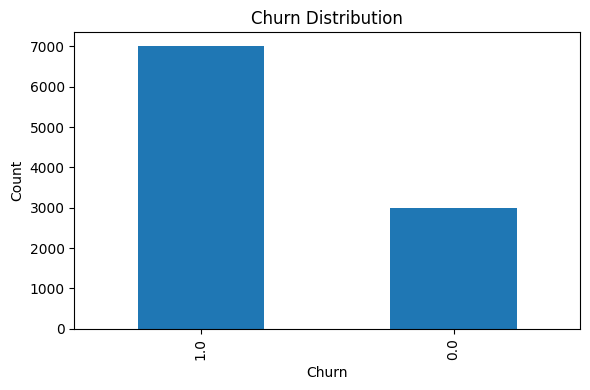

In [ ]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.tight_layout()
plt.show()

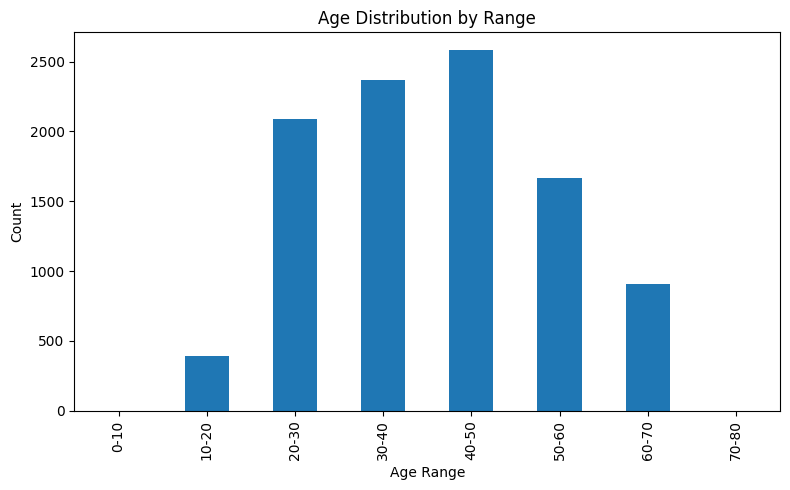

In [ ]:
bins = list(range(0, 90, 10))
labels = [f"{i}-{i+10}" for i in bins[:-1]]

df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_range_counts = df['AgeRange'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_range_counts.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Distribution by Range')
plt.tight_layout()
plt.show()

df.drop('AgeRange', inplace=True, axis=1)

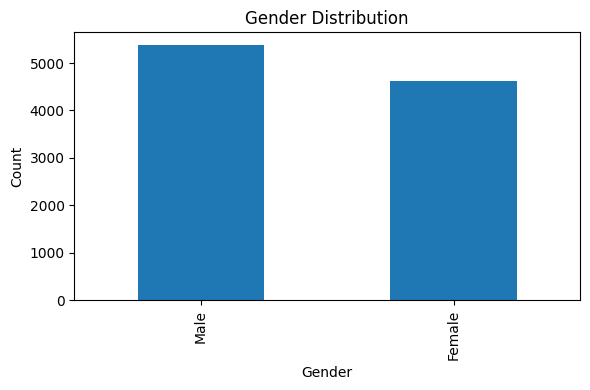

In [ ]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

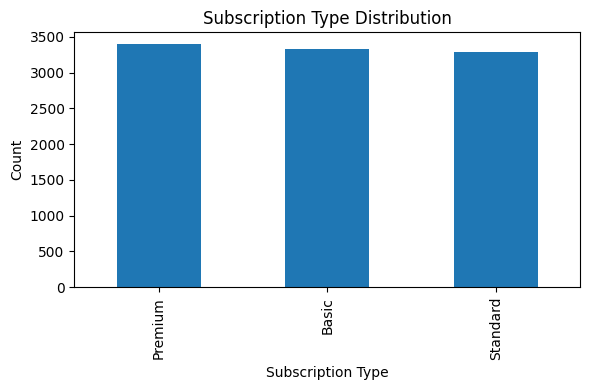

In [ ]:
subscription_counts = df['Subscription Type'].value_counts()

plt.figure(figsize=(6, 4))
subscription_counts.plot(kind='bar')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title('Subscription Type Distribution')
plt.tight_layout()
plt.show()

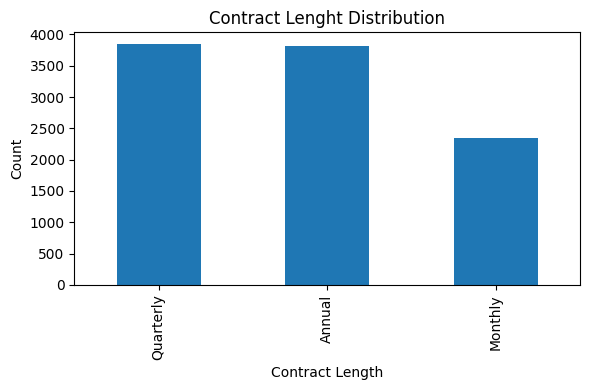

In [ ]:
contract_counts = df['Contract Length'].value_counts()

plt.figure(figsize=(6, 4))
contract_counts.plot(kind='bar')
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title('Contract Lenght Distribution')
plt.tight_layout()
plt.show()

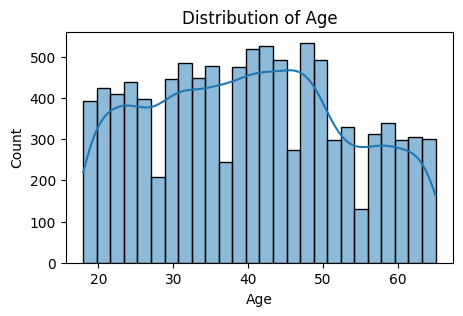

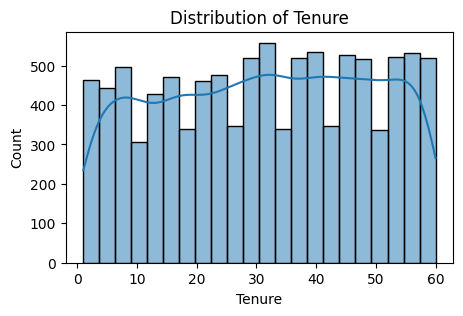

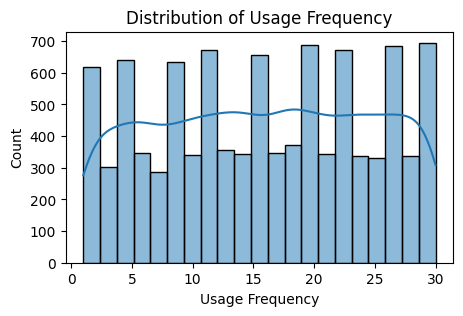

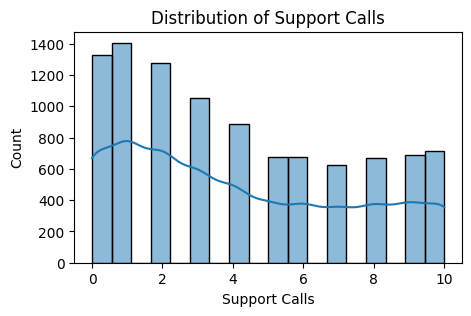

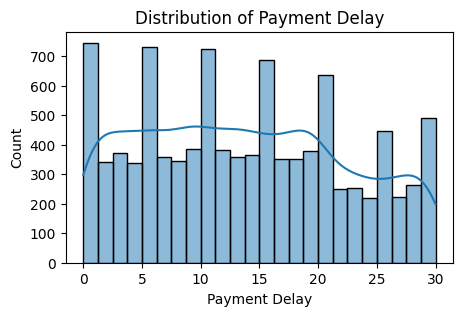

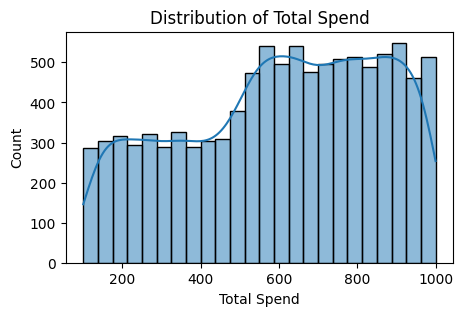

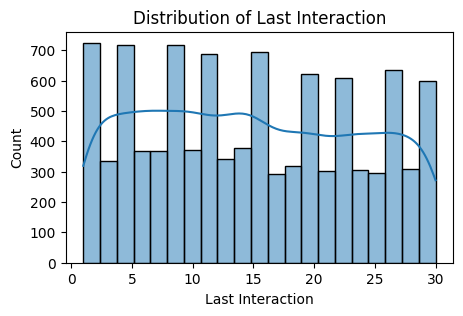

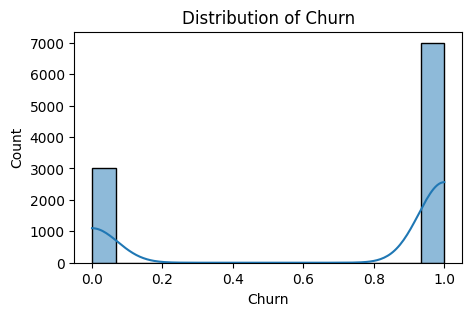

In [ ]:
# Plotting histogram.

import seaborn as sns
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = numeric_cols.drop('CustomerID')

for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()




In [ ]:
from sklearn.preprocessing import LabelEncoder

# cat_cols = df.select_dtypes(include=['object']).columns
# print(cat_cols)

cols = ['Gender', 'Subscription Type']
le = LabelEncoder()
for c in cols:
    df[c] = le.fit_transform(df[c])
    print("Category Mapping:", le.classes_)

# print(df)
# df.head()

Category Mapping: ['Female' 'Male']
Category Mapping: ['Basic' 'Premium' 'Standard']


In [ ]:
# mapping Contract duration to months

mapping = {
    'Annual': 12,
    'Quarterly': 3,
    'Monthly': 1
}

df['Contract Duration (Months)'] = df['Contract Length'].map(mapping)
df.drop('Contract Length', axis=1, inplace=True)
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Churn,Contract Duration (Months)
0,420399.0,49.0,0,47.0,16.0,4.0,6.0,1,745.58,11.0,0.0,12
1,186393.0,19.0,1,58.0,12.0,0.0,18.0,0,377.00,18.0,1.0,1
2,329257.0,42.0,0,41.0,16.0,4.0,14.0,0,986.25,4.0,0.0,12
3,219074.0,59.0,1,16.0,3.0,3.0,5.0,1,991.28,27.0,1.0,12
4,93713.0,52.0,1,44.0,12.0,4.0,17.0,2,563.00,24.0,1.0,12


In [ ]:
# adding churn col in the back.
# dropping customer id col.

col_data = df.pop("Churn")
df.insert(len(df.columns), "Churn", col_data)
# df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Contract Duration (Months),Churn
0,49.0,0,47.0,16.0,4.0,6.0,1,745.58,11.0,12,0.0
1,19.0,1,58.0,12.0,0.0,18.0,0,377.00,18.0,1,1.0
2,42.0,0,41.0,16.0,4.0,14.0,0,986.25,4.0,12,0.0
3,59.0,1,16.0,3.0,3.0,5.0,1,991.28,27.0,12,1.0
4,52.0,1,44.0,12.0,4.0,17.0,2,563.00,24.0,12,1.0


In [ ]:
df.to_csv('dataset/Preprocessed_data.csv', index=False)

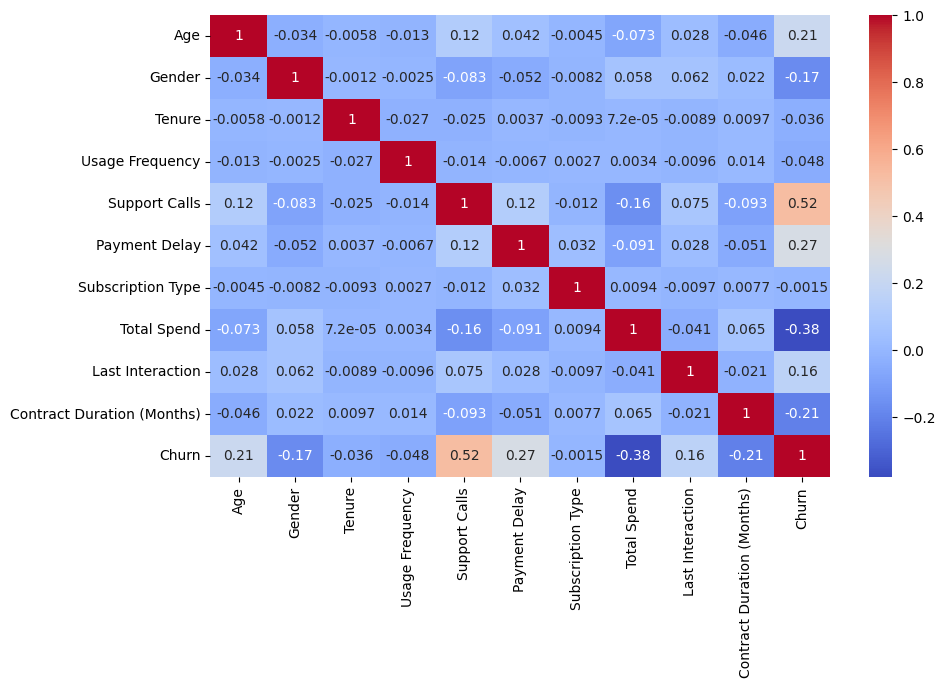

In [ ]:
# Heatmap plot

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
